In [1]:
%pwd
# os.chdir("../")
# %pwd

'd:\\multi_camera_tracking\\test_temp'

In [1]:
yaml_text = """train: 'D:/multi_camera_tracking/test_temp/data/images/train/'
val: 'D:/multi_camera_tracking/test_temp/data/images/val/'
nc: 1
names: ["person"]"""

with open("data.yaml", 'w') as file:
    file.write(yaml_text)


In [3]:
# !git clone https://github.com/ultralytics/ultralytics.git

In [4]:
from ultralytics import YOLO
 
# Load the model.
model = YOLO('yolov8s.pt')


100%|██████████| 21.5M/21.5M [00:03<00:00, 7.14MB/s]


In [2]:
import torch
USE_CUDA = torch.cuda.is_available()
device = torch.device('cuda:0' if USE_CUDA else 'cpu')
print(torch.cuda.is_available())
print(device)

True
cuda:0


In [4]:
torch.cuda.current_device()
0

0

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
os.environ["CUDA_VISIBLE_DEVICES"]= '0'

In [4]:
# !python ./yolov5/train.py --batch 16 --epochs 30 --data data.yaml --cfg ./yolov5/models/yolov5s.yaml --weights yolov5s.pt --name results_person

^C


In [7]:
# !python ./yolov5/train.py --img 415 --batch 16 --epochs 30 --data data.yaml --weights yolov5s.pt --cache

^C


In [ ]:
# yolo task=detect mode=train model=yolov8s.pt imgsz=640 data=data.yaml epochs=100 batch=8 name=yolov8s_custom

In [2]:
from ultralytics import YOLO
model = YOLO('runs/detect/yolov8s_custom/weights/best.pt') # build from YAML and transfer weights
result = model.predict(source= "data/images/val/7d42626f73ff38ac.jpg")


image 1/1 d:\multi_camera_tracking\test_temp\data\images\val\7d42626f73ff38ac.jpg: 640x640 2 persons, 14.1ms
Speed: 0.0ms preprocess, 14.1ms inference, 66.8ms postprocess per image at shape (1, 3, 640, 640)


In [3]:
result[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0.], device='cuda:0')
conf: tensor([0.8004, 0.6850], device='cuda:0')
data: tensor([[ 18.9831, 493.9178,  97.7225, 570.4402,   0.8004,   0.0000],
        [ 35.5118, 373.6923,  64.4815, 448.0917,   0.6850,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([2, 6])
xywh: tensor([[ 58.3528, 532.1790,  78.7394,  76.5224],
        [ 49.9966, 410.8920,  28.9697,  74.3994]], device='cuda:0')
xywhn: tensor([[0.0912, 0.8315, 0.1230, 0.1196],
        [0.0781, 0.6420, 0.0453, 0.1162]], device='cuda:0')
xyxy: tensor([[ 18.9831, 493.9178,  97.7225, 570.4402],
        [ 35.5118, 373.6923,  64.4815, 448.0917]], device='cuda:0')
xyxyn: tensor([[0.0297, 0.7717, 0.1527, 0.8913],
        [0.0555, 0.5839, 0.1008, 0.7001]], device='cuda:0')

In [62]:
bboxes = result[0].boxes
array_xyxy, array_conf = bboxes.xyxy, bboxes.conf

(640, 640, 3)
18.983062744140625 493.9177551269531 97.72248840332031 570.440185546875
18 493 97 570
35.51177215576172 373.69232177734375 64.48149108886719 448.0916748046875
35 373 64 448


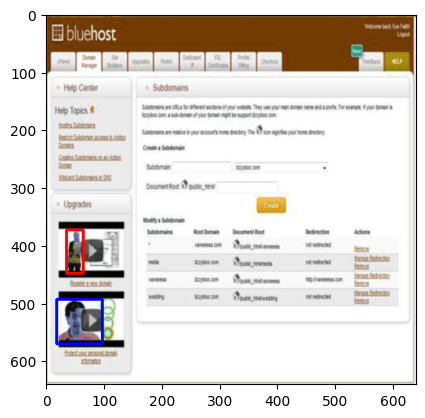

In [63]:
import cv2
import matplotlib.pyplot as plt

img = result[0].orig_img
print(img.shape)
bboxes = result[0].boxes
array_xyxy, array_conf = bboxes.xyxy, bboxes.conf
for i in range(array_xyxy.shape[0]):
    xmin, ymin , xmax, ymax = array_xyxy[i].cpu().numpy().tolist()
    print(xmin, ymin , xmax, ymax)
    xmin, ymin , xmax, ymax = int(xmin), int(ymin), int(xmax), int(ymax)
    print(xmin, ymin , xmax, ymax)
    conf = array_conf[i]
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.rectangle(img, (xmin, ymin), (xmax,ymax), color =[255], thickness = 3 )
plt.imshow(img) 
plt.show()

In [39]:
result[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person'}
obb: None
orig_img: array([[[ 27,  76, 120],
        [ 26,  75, 119],
        [ 25,  74, 118],
        ...,
        [ 35,  84, 130],
        [ 35,  84, 130],
        [ 35,  84, 130]],

       [[ 30,  79, 123],
        [ 30,  79, 123],
        [ 28,  77, 121],
        ...,
        [ 35,  84, 130],
        [ 35,  84, 130],
        [ 35,  84, 130]],

       [[ 36,  85, 129],
        [ 35,  84, 128],
        [ 34,  83, 127],
        ...,
        [ 35,  84, 130],
        [ 35,  84, 130],
        [ 35,  84, 130]],

       ...,

       [[ 37,  57,  44],
        [ 30,  46,  35],
        [ 33,  34,  30],
        ...,
        [  9,   9,   9],
        [ 11,  11,  11],
        [ 11,  11,  11]],

       [[ 40,  60,  47],
        [ 32,  48,  37],
        [ 31,  33,  27],
        ...,
        [  9,   9,   9],
        [ 11,  11,  11],
        [ 11,

In [2]:
import numpy as np

cost = np.array([[4, 1, 3], [2, 0, 5], [3, 2, 2]])

from scipy.optimize import linear_sum_assignment

a = linear_sum_assignment(cost)

a

(array([0, 1, 2], dtype=int64), array([1, 0, 2], dtype=int64))

In [6]:
import numpy as np
from scipy.optimize import linear_sum_assignment

cost = np.array([[4, 1, 3], [2, 0, 5], [3, 2, 2]])

row_ind, col_ind = linear_sum_assignment(cost)

# Hợp các mảng một chiều thành một mảng hai chiều
indices_2d = np.stack((row_ind, col_ind), axis=1)

print(indices_2d)


[[0 1]
 [1 0]
 [2 2]]


In [1]:
import colorsys
num_classes = 10

hsv_tuples = [(1.0 * x / num_classes, 1., 1.) for x in range(num_classes)]
colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
colors = list(map(lambda x: (int(x[0] * 255), int(x[1] * 255), int(x[2] * 255)), colors))
colors


[(255, 0, 0),
 (255, 153, 0),
 (203, 255, 0),
 (51, 255, 0),
 (0, 255, 102),
 (0, 255, 255),
 (0, 102, 255),
 (50, 0, 255),
 (204, 0, 255),
 (255, 0, 152)]